In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
import random

np.random.seed(29)  # For numpy numbers
random.seed(29)   # For Python

In [4]:
def extract_file_paths(path):
    image_filenames = []
    for root, dirs, files in os.walk(path):
        if len(files) > 0:
            for file in files:
                if(file[-3:] == "tif" or file[-3:] == "Tif"):
                    image_filenames.append(str(root)+os.sep+str(file))
    print(len(image_filenames))
    return image_filenames

In [5]:
image_files = extract_file_paths("C:/Users/sjcrum/Documents/Machine Learning II/Final Project/DocumentImages/train")

docs = []
for image in image_files:
    path = os.path.dirname(image)
    base = os.path.basename(path)
    docs.append(base)

docs_count = [[x,docs.count(x)] for x in set(docs)]
docs_df = pd.DataFrame(docs_count, columns=["Document_Type", "Count"])
print(docs_df)

32000
             Document_Type  Count
0                   resume   2000
1                     form   2000
2            specification   2000
3                    email   2000
4                     memo   2000
5                   letter   2000
6            questionnaire   2000
7             news article   2000
8                  invoice   2000
9             presentation   2000
10           advertisement   2000
11                  budget   2000
12             file folder   2000
13       scientific report   2000
14             handwritten   2000
15  scientific publication   2000


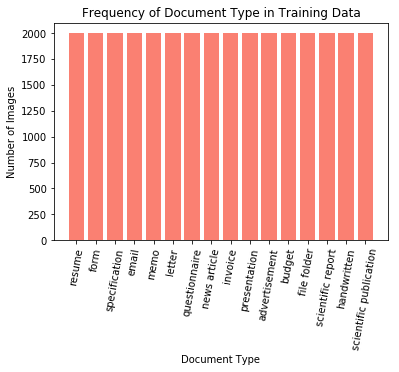

In [6]:
plt.bar(docs_df.Document_Type, docs_df.Count, color = 'salmon')
plt.title("Frequency of Document Type in Training Data")
plt.xlabel("Document Type")
plt.ylabel("Number of Images")
plt.xticks(rotation = 80)
plt.show()

In [7]:
doc_list = []
height = []
width = []

for image in image_files:
    img = cv2.imread(image)
    path = os.path.dirname(image)
    base = os.path.basename(path)
    doc_list.append(base)
    height.append(img.shape[0])
    width.append(img.shape[1])

In [8]:
image_dim = {"Document": doc_list, "Height": height, "Width": width}
image_dim_df = pd.DataFrame(image_dim, columns = ["Document", "Height", "Width"])

In [9]:
image_dim_df.groupby('Document').quantile([0, 0.25, 0.5, 0.75, 1])

Height   Width
Document                                   
advertisement          0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   762.0
                       0.75  1000.0   777.0
                       1.00  1000.0  1473.0
budget                 0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   766.0
                       0.75  1000.0   782.0
                       1.00  1000.0   869.0
email                  0.00  1000.0   754.0
                       0.25  1000.0   754.0
                       0.50  1000.0   754.0
                       0.75  1000.0   754.0
                       1.00  1000.0   802.0
file folder            0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   762.0
                       0.75  1000.0   777.0
                       1.00  1000.0   873.0
form                   0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   754.0
                       0.75  1000.0   777.0
                       1.00  1000.0   958.0
handwritten            0.00  1000.0   740.0
                       0.25  1000.0   754.0
                       0.50  1000.0   754.0
                       0.75  1000.0   771.0
                       1.00  1000.0   980.0
...                             ...     ...
presentation           0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   754.0
                       0.75  1000.0   777.0
                       1.00  1000.0   870.0
questionnaire          0.00  1000.0   607.0
                       0.25  1000.0   754.0
                       0.50  1000.0   762.0
                       0.75  1000.0   777.0
                       1.00  1000.0  2542.0
resume                 0.00  1000.0   731.0
                       0.25  1000.0   754.0
                       0.50  1000.0   754.0
                       0.75  1000.0   754.0
                       1.00  1000.0   820.0
scientific publication 0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   754.0
                       0.75  1000.0   772.0
                       1.00  1000.0   872.0
scientific report      0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   775.0
                       0.75  1000.0   777.0
                       1.00  1000.0  1096.0
specification          0.00  1000.0   611.0
                       0.25  1000.0   754.0
                       0.50  1000.0   775.0
                       0.75  1000.0   784.0
                       1.00  1000.0   901.0

[80 rows x 2 columns]

C:\Users\sjcrum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


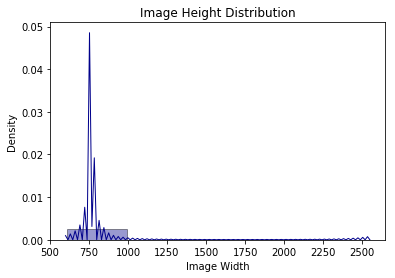

In [13]:
sns.distplot(width, hist=True, kde=True, bins=5, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})

plt.title('Image Height Distribution')
plt.xlabel('Image Width')
plt.ylabel('Density')
plt.show()